In [1]:
import pandas as pd

In [2]:
dt1 = pd.read_csv('API_SH.XPD.TOTL.ZS_DS2_en_csv_v2.csv',skiprows = 3)
dt1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.328093,9.418971,9.197723,7.871992,8.518913,8.134866,8.182274,NaN,NaN,NaN
2,Angola,AGO,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.844934,4.371774,3.391146,3.379583,3.304794,4.263032,3.306983,NaN,NaN,NaN
3,Albania,ALB,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.869416,5.791339,5.335035,5.714665,5.589173,5.655139,5.883105,NaN,NaN,NaN
4,Andorra,AND,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.567409,6.759690,7.999267,6.703791,7.547337,11.478046,8.127136,NaN,NaN,NaN


In [10]:
# find columns without any data
null_sum = dt1.apply(lambda x: sum(x.isnull()), axis=0)
null_sum = null_sum[null_sum==dt1.shape[0]]

# columns with at least one value
value_cols = []
total_cols = dt1.columns
for col in total_cols:
    if col not in null_sum.index:
        value_cols.append(col)
print(value_cols)

['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']


In [17]:
final_cols = [col for col in final_cols if col not in ['Indicator Name', 'Indicator Code']]

df1 = dt1[final_cols]
df1.head()

,Country Name,Country Code,1995,1996,1997,1998,1999,2000,2001,2002,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.763073,...,8.068104,7.433972,6.728316,8.328093,9.418971,9.197723,7.871992,8.518913,8.134866,8.182274
2,Angola,AGO,6.458878,2.814732,3.482559,3.335602,3.377844,2.787284,5.384558,3.633921,...,4.103960,4.542437,3.383112,3.844934,4.371774,3.391146,3.379583,3.304794,4.263032,3.306983
3,Albania,ALB,6.597079,7.431974,7.568100,6.943299,6.868190,6.255984,6.000144,6.300113,...,6.116311,5.861296,6.103935,5.869416,5.791339,5.335035,5.714665,5.589173,5.655139,5.883105
4,Andorra,AND,5.808000,6.094333,6.144922,7.755926,5.728308,5.781300,5.788747,5.972603,...,5.223353,5.313893,6.335456,6.567409,6.759690,7.999267,6.703791,7.547337,11.478046,8.127136


In [8]:
dt2 = pd.read_csv('Metadata_Country_API_SH.XPD.TOTL.ZS_DS2_en_csv_v2.csv')
dt2.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba,NaN
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra,NaN


In [19]:
df2 = dt2[['Country Code','Region','IncomeGroup'] ]
df2.head()

,Country Code,Region,IncomeGroup
0,ABW,Latin America & Caribbean,High income
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Lower middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income


In [25]:
df = pd.merge(df2,df1, how='inner', on=['Country Code', 'Country Code'])
df.head()

,Country Code,Region,IncomeGroup,Country Name,1995,1996,1997,1998,1999,2000,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,ABW,Latin America & Caribbean,High income,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,South Asia,Low income,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,...,8.068104,7.433972,6.728316,8.328093,9.418971,9.197723,7.871992,8.518913,8.134866,8.182274
2,AGO,Sub-Saharan Africa,Lower middle income,Angola,6.458878,2.814732,3.482559,3.335602,3.377844,2.787284,...,4.103960,4.542437,3.383112,3.844934,4.371774,3.391146,3.379583,3.304794,4.263032,3.306983
3,ALB,Europe & Central Asia,Upper middle income,Albania,6.597079,7.431974,7.568100,6.943299,6.868190,6.255984,...,6.116311,5.861296,6.103935,5.869416,5.791339,5.335035,5.714665,5.589173,5.655139,5.883105
4,AND,Europe & Central Asia,High income,Andorra,5.808000,6.094333,6.144922,7.755926,5.728308,5.781300,...,5.223353,5.313893,6.335456,6.567409,6.759690,7.999267,6.703791,7.547337,11.478046,8.127136


In [26]:
df.IncomeGroup.unique()

array(['High income', 'Low income', 'Lower middle income',
       'Upper middle income', nan], dtype=object)

In [27]:
df.groupby('IncomeGroup').mean()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
IncomeGroup,,,,,,,,,,,,,,,,,,,,
High income,6.530071,6.573175,6.483985,6.594343,6.619821,6.515375,6.673747,6.881973,7.060661,7.113476,7.099353,7.070823,6.998715,7.232691,7.887673,7.773207,7.734507,7.879058,7.956554,7.900022
Low income,4.887518,4.912478,4.924725,5.096429,5.169532,5.220729,5.168116,5.433114,5.471246,5.885412,5.988122,6.361475,6.061171,6.136145,6.458602,6.544944,6.562938,6.253643,6.131054,6.170746
Lower middle income,4.857121,4.973458,5.002149,5.064193,5.016251,5.008227,5.291197,5.381736,5.504969,5.503892,5.540440,5.453526,5.493221,5.570507,5.948796,5.764611,5.611061,5.849028,5.898574,5.853973
Upper middle income,6.141094,6.059147,6.165044,6.216385,6.185472,6.269975,6.323693,6.281101,6.380085,6.212670,6.339020,6.218675,6.369868,6.359133,6.743837,6.607103,6.503613,6.588130,6.695841,6.852885


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ValueError: could not convert string to float: 'ZWE'

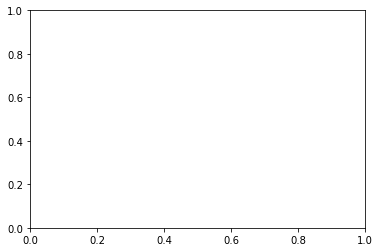

In [30]:
plt.plot(df)
plt.show()

In [7]:
dt3 = pd.read_csv('Metadata_Indicator_API_SH.XPD.TOTL.ZS_DS2_en_csv_v2.csv')
dt3.head()

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,SH.XPD.TOTL.ZS,"Health expenditure, total (% of GDP)",Total health expenditure is the sum of public ...,World Health Organization Global Health Expend...,NaN
